# DBSCAN clustering of hosts within subnet

In this notebook we are going to apply DBSCAN clustering algorithms on hosts within **2 units** of our dataset

## Imports

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Import dataset

We are using pickled preprocessed dataframe of host network behaviour 

In [2]:
df = pd.read_pickle('balanced_preprocessed_dataset.pkl')
df.head()

mean                                                              \
  FlowDuration                                                               
            00        01        02        03        04        05        06   
0    -0.007622 -0.006103 -0.009019 -0.006422 -0.012099 -0.007141 -0.007069   
1    -0.009677 -0.011074 -0.010790 -0.008082 -0.013610 -0.009863 -0.009743   
2    -0.009484 -0.010427 -0.010896 -0.008080 -0.013609 -0.009918 -0.009838   
3    -0.009932 -0.011126 -0.010762 -0.007984 -0.013595 -0.009918 -0.009470   
4    -0.007484 -0.005790 -0.008930 -0.006322 -0.012029 -0.007007 -0.006911   

                                     ...            max                      \
                                     ...          Bytes                       
         07        08        09      ...             19        20        21   
0 -0.012616 -0.009572 -0.011851      ...      -0.015290 -0.014971 -0.016604   
1 -0.014340 -0.011510 -0.014119      ...      -0.015291 -0.014971 -0.016604   
2 -0.014320 -0.011545 -0.013922      ...      -0.015291 -0.014971 -0.016604   
3 -0.014341 -0.011979 -0.014230      ...      -0.015291 -0.014971 -0.016604   
4 -0.012538 -0.009441 -0.011706      ...      -0.015274 -0.014955 -0.016588   

                               Label  \
                               Label   
         22        23 anon_net_range   
0 -0.016766 -0.016320             28   
1 -0.016766 -0.016320             28   
2 -0.016766 -0.016320             28   
3 -0.016766 -0.016320             28   
4 -0.016752 -0.016307             26   

                                                              \
                                                               
                                          addr_range    unit   
0  ef160f55b36bd48b37f22bc9c48819b1a0259c2dd27ccc...  CEITEC   
1  93b8f5a052053b0db4731b671f78b8c5e5817d38d51ba9...  CEITEC   
2  ac600c8985d0f198d532737ea9d58db00905c6c6bebb6b...  CEITEC   
3  48bab257d30b1c6eaa225275fe60fc5e1dfe61afe54ace...  CEITEC   
4  1cd00c373ace404b829e822bf076631b564bf2bc70db82...  CEITEC   

                                                     Unit_encoding  
                                                                    
                                             subunit                
0   frontendy diskovych poli a aplikacni servery ...             0  
1   frontendy diskovych poli a aplikacni servery ...             0  
2   frontendy diskovych poli a aplikacni servery ...             0  
3   frontendy diskovych poli a aplikacni servery ...             0  
4                                                CRS             0  

[5 rows x 653 columns]

In [3]:
df['Label', 'Label', 'unit'].value_counts()

UVT              3500
SKM              3246
PrirF            2599
CEITEC           2223
LF               1475
FI               1289
FF               1089
FIeduroamnaFI    1020
FSS               802
PedF              740
UKB               649
ESF               554
PravF             536
RMU               429
FSpS              410
Teiresias         130
Telc               99
IBA                96
VPN                83
CTT                19
FNBrno              7
CESNET              3
Name: (Label, Label, unit), dtype: int64

In [4]:
df.shape

(20998, 653)

## Dataset preprocessing

Pick hosts from units **UVT** and **SKM**

In [5]:
groups = ['UVT', 'SKM']

In [6]:
df = df[df['Label', 'Label', 'unit'].isin(groups)]
print(df['Label', 'Label', 'unit'].value_counts())
df.head()

UVT    3500
SKM    3246
Name: (Label, Label, unit), dtype: int64


mean                                                    \
      FlowDuration                                                     
                00        01        02        03        04        05   
13291    -0.007496 -0.005742 -0.008903 -0.006316 -0.012004 -0.006973   
13292    -0.008895 -0.008315 -0.010002 -0.006953 -0.012740 -0.008184   
13293    -0.007623 -0.006104 -0.009037 -0.006413 -0.012109 -0.007140   
13294    -0.007596 -0.006030 -0.009027 -0.006398 -0.012092 -0.007123   
13295    -0.008925 -0.009641 -0.010201 -0.007432 -0.012726 -0.008296   

                                                   ...            max  \
                                                   ...          Bytes   
             06        07        08        09      ...             19   
13291 -0.006919 -0.012518 -0.009461 -0.011721      ...      -0.015274   
13292 -0.008276 -0.013226 -0.010829 -0.012773      ...      -0.015291   
13293 -0.007082 -0.012616 -0.009489 -0.011722      ...      -0.015289   
13294 -0.007039 -0.012571 -0.009517 -0.011771      ...      -0.014638   
13295 -0.008540 -0.013556 -0.010859 -0.013467      ...      -0.015291   

                                                       Label  \
                                                       Label   
             20        21        22        23 anon_net_range   
13291 -0.014957 -0.016592 -0.016750 -0.016306             24   
13292 -0.014971 -0.016604 -0.016766 -0.016320             24   
13293 -0.014950 -0.016603 -0.016765 -0.016319             24   
13294 -0.014446 -0.016041 -0.016122 -0.016018             24   
13295 -0.014971 -0.016604 -0.016766 -0.016320             24   

                                                               \
                                                                
                                              addr_range unit   
13291  a8ce8c3977ebd10bba6849d15645105eed4d5e78006cfb...  SKM   
13292  5a5fa9cbb0325b8b154b37dfee873af049c3f7fbad8141...  SKM   
13293  0eb624c7b418aec4d9779fe9a69f171a3c452e8a163e96...  SKM   
13294  8d2375a96a2a821d927c290ed665767957ffbbdc55e547...  SKM   
13295  ceab45b2cd2a4b0f2af9c73236e4fe98f1bcd1ca8b3bff...  SKM   

                          Unit_encoding  
                                         
                  subunit                
13291   centrum Slapanice            16  
13292   centrum Slapanice            16  
13293   centrum Slapanice            16  
13294   centrum Slapanice            16  
13295   centrum Slapanice            16  

[5 rows x 653 columns]

## Train/Test Split

In [7]:
from sklearn.model_selection import train_test_split

x = df[['mean', 'max', 'min']]
y = df['Unit_encoding']
x.head()

mean                                                    \
      FlowDuration                                                     
                00        01        02        03        04        05   
13291    -0.007496 -0.005742 -0.008903 -0.006316 -0.012004 -0.006973   
13292    -0.008895 -0.008315 -0.010002 -0.006953 -0.012740 -0.008184   
13293    -0.007623 -0.006104 -0.009037 -0.006413 -0.012109 -0.007140   
13294    -0.007596 -0.006030 -0.009027 -0.006398 -0.012092 -0.007123   
13295    -0.008925 -0.009641 -0.010201 -0.007432 -0.012726 -0.008296   

                                                 ...          min            \
                                                 ...        Bytes             
             06        07        08        09    ...           14        15   
13291 -0.006919 -0.012518 -0.009461 -0.011721    ...    -0.020301 -0.017671   
13292 -0.008276 -0.013226 -0.010829 -0.012773    ...    -0.020752 -0.018040   
13293 -0.007082 -0.012616 -0.009489 -0.011722    ...    -0.020659 -0.017956   
13294 -0.007039 -0.012571 -0.009517 -0.011771    ...    -0.020658 -0.017958   
13295 -0.008540 -0.013556 -0.010859 -0.013467    ...    -0.020752 -0.018040   

                                                                             \
                                                                              
             16        17        18        19        20        21        22   
13291 -0.018476 -0.020891 -0.015201 -0.015691 -0.017608 -0.022394 -0.020095   
13292 -0.018899 -0.021301 -0.015771 -0.015889 -0.017910 -0.022626 -0.020430   
13293 -0.018811 -0.021210 -0.015701 -0.015802 -0.017840 -0.022561 -0.020380   
13294 -0.018800 -0.021137 -0.015696 -0.015812 -0.017843 -0.022542 -0.020374   
13295 -0.018899 -0.021301 -0.015771 -0.015889 -0.017910 -0.022626 -0.020430   

                 
                 
             23  
13291 -0.022354  
13292 -0.022810  
13293 -0.022730  
13294 -0.022734  
13295 -0.022810  

[5 rows x 648 columns]

## DBSCAN parameters

### minpts

Try 50 as a starting point

In [8]:
minpts = 50

### epsilon

We are going to compute k-distances for each host using knn classifier, with **k** parameter se to **minpts**

In [9]:
from sklearn.neighbors import KNeighborsClassifier
def get_k_distances(min_points):
    knn = KNeighborsClassifier(n_neighbors=min_points)
    knn.fit(x, y)
    distances, inds = knn.kneighbors(x, min_points) # returns k nearest distance for each datapoint
    distances = np.sort(distances.flatten('C')) # transform to 1-d array and sort in ascending order
    nrows = x.shape[0]
    start_ind = int((nrows * min_points) - ((nrows * min_points) / 50)) # plot only the last x distances to recognize knee
    distances = distances[start_ind::]
    fig = plt.figure(figsize=(12,10))
    plt.plot(distances)
    plt.ylabel('distance')
    plt.xlabel('index')
    plt.grid(b=True, which='major', axis='y')
    plt.title('KNN computed distance with k = ' + str(min_points))
    plt.show()

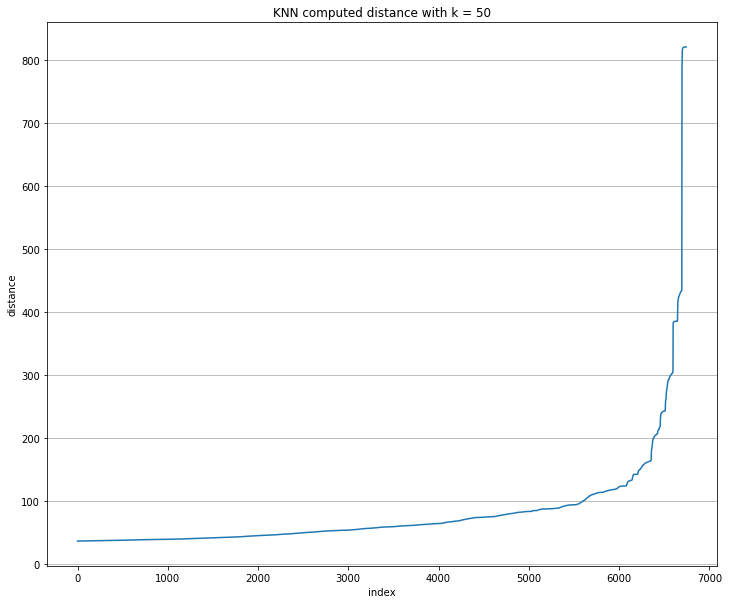

In [10]:
get_k_distances(minpts)

Knee of this graph is at around 150

In [11]:
eps = 150

## Apply DBSCAN

In [12]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=eps, min_samples=minpts)

### Performance evaluation

In [13]:
prediction = dbscan.fit_predict(x)
np.unique(prediction, return_counts=True)

(array([-1,  0]), array([   8, 6738]))

In [14]:
from sklearn import metrics

In [15]:
true_labels = df['Unit_encoding'].values
pred_labels = prediction

### ARI

In [16]:
score = metrics.adjusted_rand_score(true_labels, pred_labels) 
score

5.1090058152391445e-05

### Silhouette

In [17]:
silhouette = metrics.silhouette_score(x, pred_labels)
silhouette

0.9436256604295551

## Try to find higher performing parameters using gridsearch

In [18]:
params = { 'min_samples' : [5, 25, 50], 'eps' : [2, 4, 5, 8, 16, 32, 64, 128] }

In [19]:
def DBSCAN_Gridsearch(params):
    best_ari = -np.inf # highest achieved Adjuster Rand Index
    silhoutte_at_best = -np.inf # silhouette score at the best ari
    best_ms = -np.inf
    best_eps = -np.inf # dbscan parameters at best ARI
    for ms in params['min_samples']:
        best_ari = -np.inf # highest achieved Adjuster Rand Index
        silhoutte_at_best = -np.inf # silhouette score at the best ari
        best_ms = -np.inf
        best_eps = -np.inf # dbscan parameters at best ARI
        for ep in params['eps']:
            dbscan = DBSCAN(eps=ep, min_samples=ms)
            prediction = dbscan.fit_predict(x)
            print('Params[ min_samples: ' + str(ms) + ', epsilon: ' + str(ep) + ' ]')
            print(np.unique(prediction, return_counts=True))
            score = metrics.adjusted_rand_score(true_labels, prediction)
            print("ARI: " + str(score))
            silhouette = metrics.silhouette_score(x, prediction)
            print("Silhouette: " + str(silhouette))
            print('--------------')
            if score > best_ari:
                best_ari = score
                best_ms = ms
                best_eps = ep
                silhouette_at_best = silhouette
    return best_ms, best_eps, best_ari, silhouette_at_best

In [20]:
best_ms, best_eps, best_ari, silhouette_at_best = DBSCAN_Gridsearch(params)

Params[ min_samples: 5, epsilon: 2 ]
(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]), array([6320,  100,    5,   30,    5,   28,   61,    9,  128,   17,   15,
          5,    5,    5,    7,    6]))
ARI: -0.001402282936909346
Silhouette: -0.28725436175568525
--------------
Params[ min_samples: 5, epsilon: 4 ]
(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17]), array([5784,  306,    8,  196,   50,   72,  147,    5,   30,    5,   23,
         55,   16,   10,    6,    6,   15,    8,    4]))
ARI: 0.0010023381862770615
Silhouette: -0.2458720178601684
--------------
Params[ min_samples: 5, epsilon: 5 ]
(array([-1,  0,  1,  2,  3,  4,  5,  6,  7]), array([5584,    7,  843,   97,  115,   17,   13,   65,    5]))
ARI: 0.004487104758681898
Silhouette: -0.21480096469265345
--------------
Params[ min_samples: 5, epsilon: 8 ]
(array([-1,  0,  1,  2,  3,  4]), array([2922, 3791,   19,    5,    4,    5]))
ARI: 0.0012591839507321114
Silho

In [21]:
print("Best parameters: ")
print('Params[ min_samples: ' + str(best_ms) + ', epsilon: ' + str(best_eps) + ' ]')
print("ARI: " + str(best_ari))
print("Silhouette coefficient: " + str(silhouette_at_best))

Best parameters: 
Params[ min_samples: 50, epsilon: 16 ]
ARI: 0.0026136686542281677
Silhouette coefficient: 0.6209667117702576


### More grid search with refined params table

In [22]:
params = { 'min_samples' : [30, 40, 50, 60, 70, 80], 'eps' : [4, 5, 8, 12, 16, 18] }

In [23]:
best_ms, best_eps, best_ari, silhouette_at_best = DBSCAN_Gridsearch(params)

Params[ min_samples: 30, epsilon: 4 ]
(array([-1,  0,  1,  2,  3,  4,  5]), array([6007,  255,  173,   67,   47,  145,   52]))
ARI: 0.0011106065548187375
Silhouette: -0.2304106494516506
--------------
Params[ min_samples: 30, epsilon: 5 ]
(array([-1,  0,  1,  2,  3,  4,  5]), array([5735,  349,  199,  272,   94,   33,   64]))
ARI: 0.0031281872072519627
Silhouette: -0.16354492106939514
--------------
Params[ min_samples: 30, epsilon: 8 ]
(array([-1,  0]), array([3433, 3313]))
ARI: 0.0012032124028089003
Silhouette: 0.03944991159302876
--------------
Params[ min_samples: 30, epsilon: 12 ]
(array([-1,  0]), array([ 804, 5942]))
ARI: 0.0048351482367989685
Silhouette: 0.46841581621255984
--------------
Params[ min_samples: 30, epsilon: 16 ]
(array([-1,  0]), array([ 422, 6324]))
ARI: 0.0025768455150127732
Silhouette: 0.6213090354097962
--------------
Params[ min_samples: 30, epsilon: 18 ]
(array([-1,  0]), array([ 349, 6397]))
ARI: 0.002420793443277787
Silhouette: 0.6570631425485255
--------

In [24]:
print("Best parameters: ")
print('Params[ min_samples: ' + str(best_ms) + ', epsilon: ' + str(best_eps) + ' ]')
print("ARI: " + str(best_ari))
print("Silhouette coefficient: " + str(silhouette_at_best))

Best parameters: 
Params[ min_samples: 80, epsilon: 12 ]
ARI: 0.004583893796738196
Silhouette coefficient: 0.46031426912735046
